<a href="https://colab.research.google.com/github/srigouri/MA321/blob/main/2101259_CI_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAUSAL INFERENCE ON IHDP AND JOBS DATASET 
-------------------

My assignment is to train a machine learning model for which causality remains a hurdle.Making predictions and dealing with unfamiliar events is difficult when there is a lack of causal knowledge.Causality can help machine learning's inability to generalise.Here the task is divided into 2 parts.
Part-1 deals with IHDP dataset and 
Part-2 deals with Jobs dataset.

#Step-1 Loading required packages:

In [ ]:
!pip install econml

     |████████████████████████████████| 3.3 MB 5.6 MB/s 
     |████████████████████████████████| 123 kB 46.5 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
     |████████████████████████████████| 356 kB 45.8 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491652 sha256=99feb5b2c11130afe3dbb56725aae191a83e30f8923a5cc72e78007bc5dc27c8
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [ ]:
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import dowhy
from dowhy import CausalModel

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **PART-1**

---
# Step-2  Average Effect:



# 1.Problem Setting

To estimate the casual effects of how the family support (treatment) effects the cognitive test score for the child (outcome).


#2.Metrics

These are the two functions used to calculate Absolute error for the Average Treatment Effect (ATE) and Precision in Estimating the Heterogeneous Treatment Effect (PEHE) using two arguments true treatment effect value(effect_true) and predicted treatment effect value(effect_pred).

In [ ]:
def abs_ate(effect_true, effect_pred):
  return np.abs((np.mean(effect_true)-(np.mean(effect_pred))))

def pehe(effect_true, effect_pred):
  return np.sqrt(np.mean(np.square((effect_true - effect_pred))))

Loading IHDP Dataset:

In [ ]:
ihdp_data=pd.read_csv('https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.csv')
ihdp_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


In [ ]:
ihdp_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
count,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,747.000000,747.000000,747.000000,747.000000,...,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,3.626431e-17,2.348263e-17,-4.666801e-17,-9.012574e-16,4.518177e-17,-7.251376e-16,0.514056,0.093708,0.520750,0.364123,...,0.135207,0.156627,0.081660,0.073628,0.128514,0.157965,0.186078,3.159538,5.696107,4.016067
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500137,0.291618,0.499904,0.481506,...,0.342174,0.363692,0.274029,0.261339,0.334886,0.364953,0.389430,2.179956,1.980121,0.859736
min,-2.731287e+00,-3.800823e+00,-1.850350e+00,-8.796060e-01,-5.130428e+00,-1.851480e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.543902,-1.037628,-1.866989
25%,-6.669461e-01,-6.027100e-01,-7.332610e-01,-8.796060e-01,-5.666720e-01,-8.577868e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626779,5.053598,3.775936
50%,1.652752e-01,1.968181e-01,-3.608980e-01,1.617025e-01,1.210172e-01,-2.970882e-02,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.577294,6.209686,4.304433
75%,8.137593e-01,5.965822e-01,7.561910e-01,1.617025e-01,6.836721e-01,6.327536e-01,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.494637,6.948922,4.569454
max,1.505476e+00,2.595403e+00,2.990369e+00,2.244320e+00,2.371637e+00,2.951372e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.268228,10.171004,4.670125


In the above scenario,yf are outcomes observed with the treatment(t) i.e family support is given(t=1), no family support(t=0).ycf(counterfactuals) are the outcomes that would have been observed had the treatment been different.

In [ ]:
print('ihdp dataset:', ihdp_data.columns)
print('ihdp dataset shape:', ihdp_data.shape)


ihdp dataset: Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 't', 'yf', 'ycf', 'ite'],
      dtype='object')
ihdp dataset shape: (747, 29)


In [ ]:
ihdp_data.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
t      0
yf     0
ycf    0
ite    0
dtype: int64

In [ ]:
X=ihdp_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25']]
T=ihdp_data['t']
Yf=ihdp_data['yf']
Ycf=ihdp_data['ycf']
ite=ihdp_data['ite']

In [ ]:
Tp=pd.DataFrame(data=T)
Xp = pd.DataFrame(data=X)
X_new=Xp.join(Tp)

In [ ]:
Yf.describe()

count    747.000000
mean       3.159538
std        2.179956
min       -1.543902
25%        1.626779
50%        2.577294
75%        4.494637
max       11.268228
Name: yf, dtype: float64

In [ ]:
T.value_counts()

0.0    608
1.0    139
Name: t, dtype: int64

Checking the plots of continuous features on outcome

Text(0.5, 0.98, 'X Features')

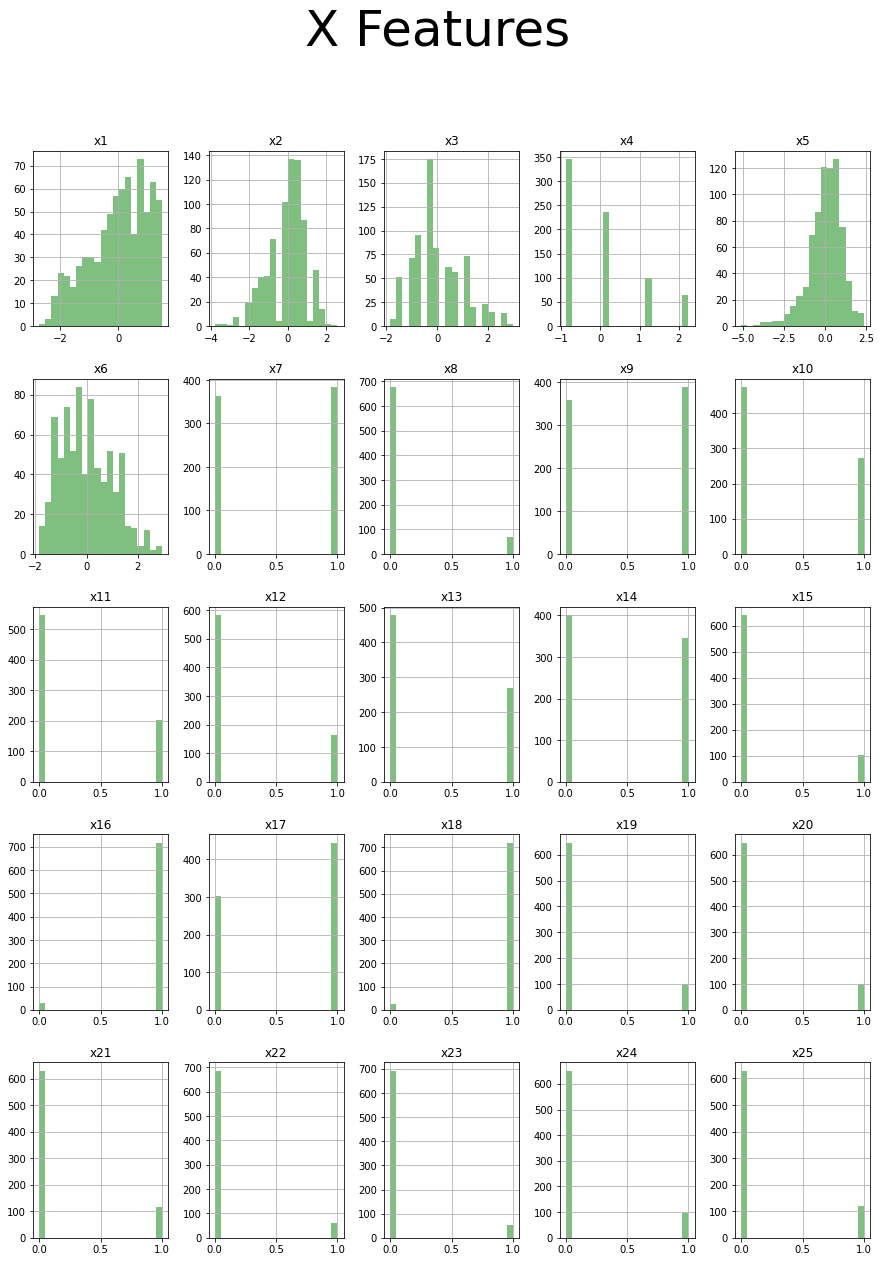

In [ ]:
axes = Xp.hist(color='g', alpha=0.5, bins=20, figsize=(15,20), layout=(5, 5))
plt.suptitle("X Features", size=50)


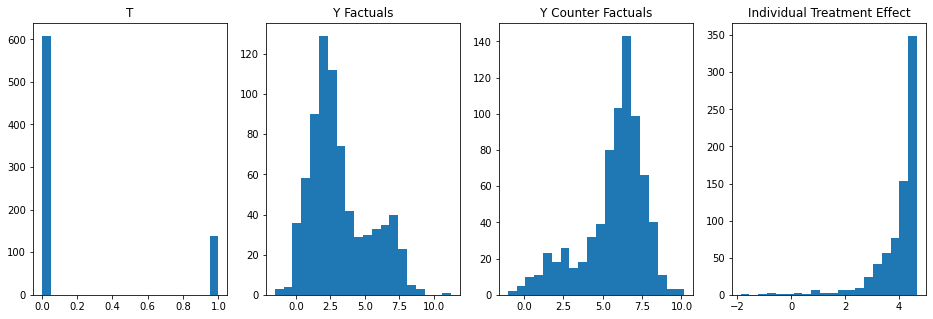

In [ ]:
bins=20
fig, axs = plt.subplots(1, 4, figsize=(16, 5))
axs[0].hist(T, bins=bins)
axs[1].hist(Yf, bins=bins)
axs[2].hist(Ycf, bins=bins)
axs[3].hist(ite, bins=bins)
axs[0].title.set_text('T')
axs[1].title.set_text('Y Factuals')
axs[2].title.set_text('Y Counter Factuals')
axs[3].title.set_text('Individual Treatment Effect')
plt.show()


#Refute

#Data Pre-processing:

In [ ]:
x_train, x_test,t_train,t_test,yf_train, yf_test, ite_train, ite_test = train_test_split(X_new,T, Yf, ite, test_size=0.2)

scaler_x = StandardScaler()
#x_train = scaler_x.fit_transform(x_train)
#x_test = scaler_x.transform(x_test)

In [ ]:
# Training data to numpy
#T_train=np.array(t_train).reshape(-1,1)
Yf_train = np.array(yf_train).reshape(-1, 1)
ITE_train = np.array(ite_train).reshape(-1,1)

# Testing data to numpy
#T_test=np.array(t_test).reshape(-1,1)
Yf_test= np.array(yf_test).reshape(-1, 1)
ITE_test = np.array(ite_test).reshape(-1,1)

**Treatment Effect:**        

The Average Treatment Effect (ATE) builds on ITE:
AT E = E[ITE]
Note: empirical (sample) ATE is the mean of ITEs

In [ ]:
ATE=np.mean(ite)
ATE

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Random Forest with default parameters.
rf = RandomForestRegressor()

# Training the regressor
rf.fit(x_train, Yf_train)

# Predictions
xt0_test = x_test[x_test['t']==0]
rf_y0_test = rf.predict(xt0_test)

xt1_test = x_test[x_test['t']==1]
rf_y1_test = rf.predict(xt1_test)

# Compute ITEs
rf_te_test = rf_y1_test - rf_y0_test

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ValueError: ignored

#LINEAR REGRESSION

Description:

 As we need to predict a numerical output,it will be a regression modelling.
With Linear Regression model I will estimate P(Y|X,T) , that is, we regress Y on X and T. Once trained, the model predicts potential outcomes  y^(i)t . Thus, to obtain ITE predictions for each individual, we need to predict both  yf^  and  ycf^ , that is, predict the outcomes for both factual and counterfactual treatments for each individual.

By calculating the difference between the factual and counterfactual outcome, we can obtain the effect per given individual. In other words:

ITEˆ(i)=yf^−ycf^

We will merge both X columns and Treatment column and build a model to make predictions on outcome.then compute ATE^ by taking average of sum of ITE^ which is obtained by diffecences of yf^ and ycf^ from test data.

#Evaluation

econml.dr.LinearDRLearner() is the CATE Estimator I am planning to use for double robustness and evaluate my predictions using metrics functions Abs_ate and pehe functions.

To clean up residual covariate imbalance,regression adjustment like "double robustness" is used.

Function to compute sample weights.



In [ ]:
def get_ps_weights(clf, x, t):
  ti = np.squeeze(t)
  clf.fit(x, ti)
  ptx = clf.predict_proba(x).T[1].T + 0.0001
  wi = ((ti/ptx)+((1-ti)/(1-ptx))) 
  return wi

#PART-2



---------------------------------------------------------------------------------------------------------



#1.Problem Setting
To check how the employment status of people depends on job training from NSWP.

Loading Jobs Dataset:

The Jobs dataset is a combination of the experiment done by as part of the National
Supported Work Program (NSWP) and observational data from the Panel Study of Income Dynamics (PSID)

In [ ]:
Jobs_data=pd.read_csv('https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/jobs.csv')
Jobs_data.head()

In [ ]:
Jobs_data.describe()

Checking the outcomes for how many had undergone NSWP training and has got job placement.


In [ ]:
Jobs_data['y'].value_counts()

Checking for any null values in data.

In [ ]:
Jobs_data.isnull().sum()

In [ ]:
X_jobs=Jobs_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17']]
T_jobs=Jobs_data['t']
Y_jobs=Jobs_data['y']
e_jobs=Jobs_data['e']

In [ ]:
e_jobs.value_counts()

In [ ]:
Jobs_data.hist(column='y',by='t')

#Data Pre-processing:

Data is split into Training and Testing sets in 80:20 ratio where training data is used for modelling and test data is used for predictions and evaluation.

In [ ]:
X_jobs_train, X_jobs_test, T_jobs_train, T_jobs_test, Y_jobs_train, Y_jobs_test, e_jobs_train, e_jobs_test = train_test_split(X_jobs, T_jobs, Y_jobs, e_jobs, test_size=0.2)

scaler_x = StandardScaler()
X_jobs_train = scaler_x.fit_transform(X_jobs_train)
X_jobs_test = scaler_x.transform(X_jobs_test)

#LOGISTIC REGRESSION

Description:

As we need to predict a binary output,it will be a logistic regression modelling.We can also choose different models like decision trees,random forest.
With Logistic Regression model I will estimate P(Y|X,T) , that is, we regress Y on X and T. Once trained, the model predicts potential outcomes  y^(i)t .




# Modelling and Making predictions

#Evaluation

We can then choose CATE estimators and can compare S-learner,T-learner,X-learner using violin plots